<a href="https://colab.research.google.com/github/PatoTlax/restaurant/blob/main/SALES_PREDICT_RESTAURANT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import statistics as stats
from sklearn import datasets, linear_model
import scipy
pd.set_option('display.max_colwidth', None)

# **File import locally**

In [ ]:
from google.colab import files
files.upload()
df = pd.read_csv('VENTASGV.csv')

Saving VENTASGV.csv to VENTASGV.csv


In [ ]:
df.head(5)

,FECHA,VENTAS,DIA TEXTO,DIA NUMERO,MES,AÑO,DIA Y MES
0,2/10/23,7789,lunes,2,oct,2023,"lunes, octubre"
1,1/10/23,8262,domingo,1,oct,2023,"domingo, octubre"
2,30/9/23,8362,sábado,30,sept,2023,"sábado, septiembre"
3,29/9/23,3535,viernes,29,sept,2023,"viernes, septiembre"
4,28/9/23,5830,jueves,28,sept,2023,"jueves, septiembre"


# **EDA**

In [ ]:
df.describe()

,VENTAS,DIA NUMERO,AÑO,Total de ventas
count,2101.000000,2101.000000,2101.000000,2101.000000
mean,5418.177059,15.708234,2020.392670,135547.176583
std,4505.591515,8.805197,1.662048,47975.574386
min,0.000000,1.000000,2018.000000,67034.000000
25%,2454.000000,8.000000,2019.000000,100227.000000
50%,4404.000000,16.000000,2020.000000,127415.000000
75%,7121.000000,23.000000,2022.000000,169278.000000
max,43737.000000,31.000000,2023.000000,305124.000000


In [ ]:
df.shape

(2101, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FECHA            2093 non-null   object 
 1   VENTAS           2093 non-null   int64  
 2   DIA TEXTO        2093 non-null   object 
 3   DIA NUMERO       2093 non-null   int64  
 4   MES              2093 non-null   object 
 5   AÑO              2093 non-null   int64  
 6   DIA Y MES        2093 non-null   object 
 7   Total de ventas  2093 non-null   int64  
 8   Media            2093 non-null   float64
 9   Mediana          2093 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 163.6+ KB


In [ ]:
df.shape

(2101, 8)

# **DATA SEPARATION BY DAYS AND MONTHS**

In [ ]:
df.head()

,FECHA,VENTAS,DIA TEXTO,DIA NUMERO,MES,AÑO,DIA Y MES,Total de ventas,Media,Mediana
0,2/10/23,7789,lunes,2,oct,2023,"lunes, octubre",79893,3473.61,3997.0
1,1/10/23,8262,domingo,1,oct,2023,"domingo, octubre",173525,7544.57,8262.0
2,30/9/23,8362,sábado,30,sept,2023,"sábado, septiembre",130135,5005.19,4318.5
3,29/9/23,3535,viernes,29,sept,2023,"viernes, septiembre",151114,5812.08,4640.0
4,28/9/23,5830,jueves,28,sept,2023,"jueves, septiembre",125935,4843.65,4457.5


In [ ]:
df['DIA TEXTO'] = df['DIA TEXTO'].str.strip()

In [ ]:
# Eliminar indices del 2018 con 0, en el mes de enero
indices_a_eliminar = [2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100]
df = df.drop(indices_a_eliminar)

In [ ]:
# Agregar columna con ventas totales por día
df['Total de ventas'] = df.groupby(['DIA TEXTO', 'MES'])['VENTAS'].transform('sum')

In [ ]:
# Agregar columna con promedio de ventas por día
df['Media'] = df.groupby(['DIA TEXTO', 'MES'])['VENTAS'].transform('mean').round(2)

In [ ]:
# Agregar columna con mediana de ventas por día
df['Mediana'] = df.groupby(['DIA TEXTO', 'MES'])['VENTAS'].transform('median')

**JANUARY**

In [ ]:
#Enero
# FILTRAR MESES POR ENERO
ene = df[(df['MES'] == 'ene')]
ene.head()

,FECHA,VENTAS,DIA TEXTO,DIA NUMERO,MES,AÑO,DIA Y MES,Total de ventas,Media,Mediana
244,31/1/23,6020,martes,31,ene,2023,"martes, enero",88445,3401.73,3061.5
245,30/1/23,3647,lunes,30,ene,2023,"lunes, enero",71260,2850.40,1927.0
246,29/1/23,3642,domingo,29,ene,2023,"domingo, enero",182843,7032.42,5446.5
247,28/1/23,10165,sábado,28,ene,2023,"sábado, enero",144380,5775.20,5206.0
248,27/1/23,15928,viernes,27,ene,2023,"viernes, enero",134958,5398.32,4289.0


In [ ]:
#Enero
#Eliminar columnas
ene = ene.drop(['FECHA', 'VENTAS', 'DIA NUMERO', 'DIA Y MES', 'AÑO'], axis = 1)

In [ ]:
#Enero
#Eliminar Filas sobrantes
ene = ene.head(7)

In [ ]:
ene.shape

(7, 5)

In [ ]:
ene

,DIA TEXTO,MES,Total de ventas,Media,Mediana
244,martes,ene,88445,3401.73,3061.5
245,lunes,ene,71260,2850.40,1927.0
246,domingo,ene,182843,7032.42,5446.5
247,sábado,ene,144380,5775.20,5206.0
248,viernes,ene,134958,5398.32,4289.0
249,jueves,ene,88049,3521.96,2909.0
250,miércoles,ene,90747,3490.27,3309.5


**FEBRUARY**

In [ ]:
#Febrero
# FILTRAR MESES POR FEBRERO
feb = df[(df['MES'] == 'feb')]
feb.head()

,FECHA,VENTAS,DIA TEXTO,DIA NUMERO,MES,AÑO,DIA Y MES,Total de ventas,Media,Mediana
216,28/2/23,5839,martes,28,feb,2023,"martes, febrero",104688,4362.00,3737.5
217,27/2/23,2760,lunes,27,feb,2023,"lunes, febrero",82340,3430.83,2867.0
218,26/2/23,9361,domingo,26,feb,2023,"domingo, febrero",211743,8822.62,7035.0
219,25/2/23,10338,sábado,25,feb,2023,"sábado, febrero",170093,6803.72,6843.0
220,24/2/23,3494,viernes,24,feb,2023,"viernes, febrero",127144,5297.67,4636.0


In [ ]:
#Febrero
#Eliminar columnas
feb = feb.drop(['FECHA', 'VENTAS', 'DIA NUMERO', 'DIA Y MES', 'AÑO'], axis = 1)

In [ ]:
#Febrero
#Eliminar Filas sobrantes
feb = feb.head(7)

In [ ]:
feb.shape

(7, 5)

In [ ]:
feb

,DIA TEXTO,MES,Total de ventas,Media,Mediana
216,martes,feb,104688,4362.00,3737.5
217,lunes,feb,82340,3430.83,2867.0
218,domingo,feb,211743,8822.62,7035.0
219,sábado,feb,170093,6803.72,6843.0
220,viernes,feb,127144,5297.67,4636.0
221,jueves,feb,173589,7232.88,4432.0
222,miércoles,feb,84046,3501.92,2641.5


**MARCH**

In [ ]:
#Marzo
# FILTRAR MESES POR MARZO
mar = df[(df['MES'] == 'mar')]
mar.head()

,FECHA,VENTAS,DIA TEXTO,DIA NUMERO,MES,AÑO,DIA Y MES,Total de ventas,Media,Mediana
185,31/3/23,5058,viernes,31,mar,2023,"viernes, marzo",158701,5877.81,5214.0
186,30/3/23,7579,jueves,30,mar,2023,"jueves, marzo",92335,3419.81,3062.0
187,29/3/23,5851,miércoles,29,mar,2023,"miércoles, marzo",126368,4680.30,4022.0
188,28/3/23,4064,martes,28,mar,2023,"martes, marzo",110790,4103.33,3615.0
189,27/3/23,5168,lunes,27,mar,2023,"lunes, marzo",100227,3854.88,2327.5


In [ ]:
#Marzo
#Eliminar columnas
mar = mar.drop(['FECHA', 'VENTAS', 'DIA NUMERO', 'DIA Y MES', 'AÑO'], axis = 1)

In [ ]:
#Marzo
#Eliminar Filas sobrantes
mar = mar.head(7)

In [ ]:
mar.shape

(7, 5)

In [ ]:
mar

,DIA TEXTO,MES,Total de ventas,Media,Mediana
185,viernes,mar,158701,5877.81,5214.0
186,jueves,mar,92335,3419.81,3062.0
187,miércoles,mar,126368,4680.30,4022.0
188,martes,mar,110790,4103.33,3615.0
189,lunes,mar,100227,3854.88,2327.5
190,domingo,mar,220570,8483.46,6915.0
191,sábado,mar,169996,6538.31,6195.5


**APRIL**

In [ ]:
#Abril
# FILTRAR MESES POR ABRIL
abr = df[(df['MES'] == 'abr')]
abr.head()

,FECHA,VENTAS,DIA TEXTO,DIA NUMERO,MES,AÑO,DIA Y MES,Total de ventas,Media,Mediana
155,30/4/23,12096,domingo,30,abr,2023,"domingo, abril",222045,8540.19,9106.0
156,29/4/23,5743,sábado,29,abr,2023,"sábado, abril",108399,4169.19,3062.0
157,28/4/23,14621,viernes,28,abr,2023,"viernes, abril",127415,4900.58,3939.0
158,27/4/23,4454,jueves,27,abr,2023,"jueves, abril",80383,3091.65,2703.0
159,26/4/23,2432,miércoles,26,abr,2023,"miércoles, abril",77493,3099.72,2432.0


In [ ]:
#Abril
#Eliminar columnas
abr = abr.drop(['FECHA', 'VENTAS', 'DIA NUMERO', 'DIA Y MES', 'AÑO'], axis = 1)

In [ ]:
#Abril
#Eliminar Filas sobrantes
abr = abr.head(7)

In [ ]:
abr.shape

(7, 5)

In [ ]:
abr

,DIA TEXTO,MES,Total de ventas,Media,Mediana
155,domingo,abr,222045,8540.19,9106.0
156,sábado,abr,108399,4169.19,3062.0
157,viernes,abr,127415,4900.58,3939.0
158,jueves,abr,80383,3091.65,2703.0
159,miércoles,abr,77493,3099.72,2432.0
160,martes,abr,102652,4106.08,3220.0
161,lunes,abr,107008,4115.69,3380.5


**MAY**

In [ ]:
#Mayo
# FILTRAR MESES POR MAYO
may = df[(df['MES'] == 'may')]
may.head()

,FECHA,VENTAS,DIA TEXTO,DIA NUMERO,MES,AÑO,DIA Y MES,Total de ventas,Media,Mediana
124,31/5/23,5094,miércoles,31,may,2023,"miércoles, mayo",152177,5636.19,3842.0
125,30/5/23,956,martes,30,may,2023,"martes, mayo",121888,4514.37,3609.0
126,29/5/23,765,lunes,29,may,2023,"lunes, mayo",104260,3861.48,1667.0
127,28/5/23,14657,domingo,28,may,2023,"domingo, mayo",236670,8765.56,8680.0
128,27/5/23,10265,sábado,27,may,2023,"sábado, mayo",190588,7330.31,8222.5


In [ ]:
#Mayo
#Eliminar columnas
may = may.drop(['FECHA', 'VENTAS', 'DIA NUMERO', 'DIA Y MES', 'AÑO'], axis = 1)

In [ ]:
#Mayo
#Eliminar Filas sobrantes
may = may.head(7)

In [ ]:
may.shape

(7, 5)

In [ ]:
may

,DIA TEXTO,MES,Total de ventas,Media,Mediana
124,miércoles,may,152177,5636.19,3842.0
125,martes,may,121888,4514.37,3609.0
126,lunes,may,104260,3861.48,1667.0
127,domingo,may,236670,8765.56,8680.0
128,sábado,may,190588,7330.31,8222.5
129,viernes,may,203235,7816.73,6120.5
130,jueves,may,111771,4298.88,2532.5


**JUNE**

In [ ]:
#Junio
# FILTRAR MESES POR JUNIO
jun = df[(df['MES'] == 'jun')]
jun.head()

,FECHA,VENTAS,DIA TEXTO,DIA NUMERO,MES,AÑO,DIA Y MES,Total de ventas,Media,Mediana
94,30/6/23,10274,viernes,30,jun,2023,"viernes, junio",148414,5708.23,5712.0
95,29/6/23,5415,jueves,29,jun,2023,"jueves, junio",148026,5693.31,4714.5
96,28/6/23,5242,miércoles,28,jun,2023,"miércoles, junio",126936,4882.15,4285.5
97,27/6/23,6074,martes,27,jun,2023,"martes, junio",110389,4245.73,3425.5
98,26/6/23,3528,lunes,26,jun,2023,"lunes, junio",78594,3143.76,3004.0


In [ ]:
#Junio
#Eliminar columnas
jun = jun.drop(['FECHA', 'VENTAS', 'DIA NUMERO', 'DIA Y MES', 'AÑO'], axis = 1)

In [ ]:
#Junio
#Eliminar Filas sobrantes
jun = jun.head(7)

In [ ]:
jun.shape

(7, 5)

In [ ]:
jun

,DIA TEXTO,MES,Total de ventas,Media,Mediana
94,viernes,jun,148414,5708.23,5712.0
95,jueves,jun,148026,5693.31,4714.5
96,miércoles,jun,126936,4882.15,4285.5
97,martes,jun,110389,4245.73,3425.5
98,lunes,jun,78594,3143.76,3004.0
99,domingo,jun,266857,10674.28,7851.0
100,sábado,jun,154203,5930.88,6219.0


**JULY**

In [ ]:
#Julio
# FILTRAR MESES POR JULIO
jul = df[(df['MES'] == 'jul')]
jul.head()

,FECHA,VENTAS,DIA TEXTO,DIA NUMERO,MES,AÑO,DIA Y MES,Total de ventas,Media,Mediana
63,31/7/23,2613,lunes,31,jul,2023,"lunes, julio",80217,2971.00,2613.0
64,30/7/23,6613,domingo,30,jul,2023,"domingo, julio",186111,6893.00,6486.0
65,29/7/23,5389,sábado,29,jul,2023,"sábado, julio",191993,7110.85,6808.0
66,28/7/23,2226,viernes,28,jul,2023,"viernes, julio",138431,5127.07,4667.0
67,27/7/23,12053,jueves,27,jul,2023,"jueves, julio",135514,5212.08,4784.5


In [ ]:
#Julio
#Eliminar columnas
jul = jul.drop(['FECHA', 'VENTAS', 'DIA NUMERO', 'DIA Y MES', 'AÑO'], axis = 1)

In [ ]:
#Julio
#Eliminar Filas sobrantes
jul = jul.head(7)

In [ ]:
jul.shape

(7, 5)

In [ ]:
jul

,DIA TEXTO,MES,Total de ventas,Media,Mediana
63,lunes,jul,80217,2971.00,2613.0
64,domingo,jul,186111,6893.00,6486.0
65,sábado,jul,191993,7110.85,6808.0
66,viernes,jul,138431,5127.07,4667.0
67,jueves,jul,135514,5212.08,4784.5
68,miércoles,jul,144482,5557.00,4394.0
69,martes,jul,120429,4631.88,4290.0


**AUGUST**

In [ ]:
#Agosto
# FILTRAR MESES POR JULIO
ago = df[(df['MES'] == 'ago')]
jul.head()

,DIA TEXTO,MES,Total de ventas,Media,Mediana
63,lunes,jul,80217,2971.00,2613.0
64,domingo,jul,186111,6893.00,6486.0
65,sábado,jul,191993,7110.85,6808.0
66,viernes,jul,138431,5127.07,4667.0
67,jueves,jul,135514,5212.08,4784.5


In [ ]:
#Agosto
#Eliminar columnas
ago = ago.drop(['FECHA', 'VENTAS', 'DIA NUMERO', 'DIA Y MES', 'AÑO'], axis = 1)

In [ ]:
#Ago
#Eliminar Filas sobrantes
ago = ago.head(7)

In [ ]:
ago.shape

(7, 5)

In [ ]:
ago

,DIA TEXTO,MES,Total de ventas,Media,Mediana
32,jueves,ago,109753,4064.93,3652.0
33,miércoles,ago,111787,4140.26,3477.0
34,martes,ago,103548,3835.11,3900.0
35,lunes,ago,82984,3073.48,2775.0
36,domingo,ago,215988,8307.23,8307.0
37,sábado,ago,189915,7304.42,5587.0
38,viernes,ago,147697,5680.65,4672.5


**SEPTEMBER**

In [ ]:
#Septiembre
# FILTRAR MESES POR SEPTIEMBRE
sept = df[(df['MES'] == 'sept')]
sept.head()

,FECHA,VENTAS,DIA TEXTO,DIA NUMERO,MES,AÑO,DIA Y MES,Total de ventas,Media,Mediana
2,30/9/23,8362,sábado,30,sept,2023,"sábado, septiembre",130135,5005.19,4318.5
3,29/9/23,3535,viernes,29,sept,2023,"viernes, septiembre",151114,5812.08,4640.0
4,28/9/23,5830,jueves,28,sept,2023,"jueves, septiembre",125935,4843.65,4457.5
5,27/9/23,4599,miércoles,27,sept,2023,"miércoles, septiembre",94659,3640.73,3548.0
6,26/9/23,5238,martes,26,sept,2023,"martes, septiembre",79873,3194.92,3519.0


In [ ]:
#Septiembre
#Eliminar columnas
sept = sept.drop(['FECHA', 'VENTAS', 'DIA NUMERO', 'DIA Y MES', 'AÑO'], axis = 1)

In [ ]:
#Septiembre
#Eliminar Filas sobrantes
sept = sept.head(7)

In [ ]:
sept.shape

(7, 5)

In [ ]:
sept

,DIA TEXTO,MES,Total de ventas,Media,Mediana
2,sábado,sept,130135,5005.19,4318.5
3,viernes,sept,151114,5812.08,4640.0
4,jueves,sept,125935,4843.65,4457.5
5,miércoles,sept,94659,3640.73,3548.0
6,martes,sept,79873,3194.92,3519.0
7,lunes,sept,67034,2681.36,2469.0
8,domingo,sept,169278,6510.69,6141.5


**OCTOBER**

In [ ]:
#Octubre
# FILTRAR MESES POR OCTUBRE
oct = df[(df['MES'] == 'oct')]
oct.head()

,FECHA,VENTAS,DIA TEXTO,DIA NUMERO,MES,AÑO,DIA Y MES,Total de ventas,Media,Mediana
0,2/10/23,7789,lunes,2,oct,2023,"lunes, octubre",79893,3473.61,3997.0
1,1/10/23,8262,domingo,1,oct,2023,"domingo, octubre",173525,7544.57,8262.0
336,31/10/22,5338,lunes,31,oct,2022,"lunes, octubre",79893,3473.61,3997.0
337,30/10/22,9875,domingo,30,oct,2022,"domingo, octubre",173525,7544.57,8262.0
338,29/10/22,9175,sábado,29,oct,2022,"sábado, octubre",183734,7988.43,6877.0


In [ ]:
#Octubre
#Eliminar columnas
oct = oct.drop(['FECHA', 'VENTAS', 'DIA NUMERO', 'DIA Y MES', 'AÑO'], axis = 1)

In [ ]:
# Eliminar fila 0
#df = df.drop(df.index[250:])
oct = oct.drop(oct.index [0])

In [ ]:
# Eliminar fila 1
oct = oct.drop(oct.index [0])

In [ ]:
#Octubre
#Eliminar Filas sobrantes
oct = oct.head(7)

In [ ]:
oct.shape

(7, 5)

In [ ]:
oct.head(10)

,DIA TEXTO,MES,Total de ventas,Media,Mediana
337,domingo,oct,173525,7544.57,8262.0
338,sábado,oct,183734,7988.43,6877.0
339,viernes,oct,156739,7124.50,5621.5
340,jueves,oct,104417,4746.23,4147.5
341,miércoles,oct,72979,3317.23,2810.0
342,martes,oct,73121,3323.68,3247.0
343,lunes,oct,79893,3473.61,3997.0


**NOVEMBER**

In [ ]:
#Noviembre
# FILTRAR MESES POR NOVIEMBRE
nov = df[(df['MES'] == 'nov')]
nov.head()

,FECHA,VENTAS,DIA TEXTO,DIA NUMERO,MES,AÑO,DIA Y MES,Total de ventas,Media,Mediana
306,30/11/22,11142,miércoles,30,nov,2022,"miércoles, noviembre",91832,4372.95,3738.0
307,29/11/22,15952,martes,29,nov,2022,"martes, noviembre",98743,4488.32,3839.0
308,28/11/22,5882,lunes,28,nov,2022,"lunes, noviembre",71969,3271.32,2765.0
309,27/11/22,8686,domingo,27,nov,2022,"domingo, noviembre",165525,7882.14,6901.0
310,26/11/22,5535,sábado,26,nov,2022,"sábado, noviembre",127444,6068.76,5535.0


In [ ]:
#Noviembre
#Eliminar columnas
nov = nov.drop(['FECHA', 'VENTAS', 'DIA NUMERO', 'DIA Y MES', 'AÑO'], axis = 1)

In [ ]:
#Noviembre
#Eliminar Filas sobrantes
nov = nov.head(7)

In [ ]:
nov

,DIA TEXTO,MES,Total de ventas,Media,Mediana
306,miércoles,nov,91832,4372.95,3738.0
307,martes,nov,98743,4488.32,3839.0
308,lunes,nov,71969,3271.32,2765.0
309,domingo,nov,165525,7882.14,6901.0
310,sábado,nov,127444,6068.76,5535.0
311,viernes,nov,159262,7239.18,6003.0
312,jueves,nov,101817,4848.43,4091.0


**DECEMBER**

In [ ]:
#Diciembre
# FILTRAR MESES POR DICIEMBRE
dic = df[(df['MES'] == 'dic')]
dic.head()

,FECHA,VENTAS,DIA TEXTO,DIA NUMERO,MES,AÑO,DIA Y MES,Total de ventas,Media,Mediana
275,31/12/22,6913,sábado,31,dic,2022,"sábado, diciembre",132449,6020.41,5956.0
276,30/12/22,6217,viernes,30,dic,2022,"viernes, diciembre",195329,8878.59,8077.5
277,29/12/22,7812,jueves,29,dic,2022,"jueves, diciembre",305124,13266.26,9735.0
278,28/12/22,16302,miércoles,28,dic,2022,"miércoles, diciembre",138739,6306.32,5539.0
279,27/12/22,6056,martes,27,dic,2022,"martes, diciembre",128997,5863.50,4881.5


In [ ]:
#Noviembre
#Eliminar columnas
dic = dic.drop(['FECHA', 'VENTAS', 'DIA NUMERO', 'DIA Y MES', 'AÑO'], axis = 1)

In [ ]:
#Noviembre
#Eliminar Filas sobrantes
dic = dic.head(7)

In [ ]:
dic.shape

(7, 5)

In [ ]:
dic

,DIA TEXTO,MES,Total de ventas,Media,Mediana
275,sábado,dic,132449,6020.41,5956.0
276,viernes,dic,195329,8878.59,8077.5
277,jueves,dic,305124,13266.26,9735.0
278,miércoles,dic,138739,6306.32,5539.0
279,martes,dic,128997,5863.50,4881.5
280,lunes,dic,143574,6526.09,7258.5
281,domingo,dic,188786,8581.18,6725.0


# **CONCATENATION OF MONTHS**

In [ ]:
dfr = pd.concat([ene, feb, mar, abr, may, jun, jul, ago, sept, oct, nov, dic])
dfr.head()

,DIA TEXTO,MES,Total de ventas,Media,Mediana
244,martes,ene,88445,3401.73,3061.5
245,lunes,ene,71260,2850.40,1927.0
246,domingo,ene,182843,7032.42,5446.5
247,sábado,ene,144380,5775.20,5206.0
248,viernes,ene,134958,5398.32,4289.0


In [ ]:
dfr.shape

(84, 5)

In [ ]:
# Reescribir los indices de la concatenación
dfr.reset_index(drop = True, inplace = True)
dfr.head()

,DIA TEXTO,MES,Total de ventas,Media,Mediana
0,martes,ene,88445,3401.73,3061.5
1,lunes,ene,71260,2850.40,1927.0
2,domingo,ene,182843,7032.42,5446.5
3,sábado,ene,144380,5775.20,5206.0
4,viernes,ene,134958,5398.32,4289.0


# **PREPARING DATA FOR MODELING 1**

In [ ]:
# Crear Train
data_train = dfr.sample(frac = 0.8, random_state = 786)

In [ ]:
data_train.shape

(67, 5)

In [ ]:
data_train.head()

,DIA TEXTO,MES,Total de ventas,Media,Mediana
37,miércoles,jun,126936,4882.15,4285.5
82,lunes,dic,143574,6526.09,7258.5
44,sábado,jul,191993,7110.85,6808.0
77,sábado,dic,132449,6020.41,5956.0
13,miércoles,feb,84046,3501.92,2641.5


In [ ]:
# Crear Test
data_test = dfr.drop(data_train.index)

In [ ]:
data_test.shape

(17, 5)

In [ ]:
data_test.head()

,DIA TEXTO,MES,Total de ventas,Media,Mediana
4,viernes,ene,134958,5398.32,4289.0
5,jueves,ene,88049,3521.96,2909.0
10,sábado,feb,170093,6803.72,6843.0
18,lunes,mar,100227,3854.88,2327.5
20,sábado,mar,169996,6538.31,6195.5


In [ ]:
# Reescribir los indices Train
data_train.reset_index(drop = True, inplace = True)
data_train.head()

,DIA TEXTO,MES,Total de ventas,Media,Mediana
0,miércoles,jun,126936,4882.15,4285.5
1,lunes,dic,143574,6526.09,7258.5
2,sábado,jul,191993,7110.85,6808.0
3,sábado,dic,132449,6020.41,5956.0
4,miércoles,feb,84046,3501.92,2641.5


In [ ]:
# Reescribir los indices de Test
data_test.reset_index(drop = True, inplace = True)
data_test.head()

,DIA TEXTO,MES,Total de ventas,Media,Mediana
0,viernes,ene,134958,5398.32,4289.0
1,jueves,ene,88049,3521.96,2909.0
2,sábado,feb,170093,6803.72,6843.0
3,lunes,mar,100227,3854.88,2327.5
4,sábado,mar,169996,6538.31,6195.5


# **PYCARET**

REGRESSION MODEL TO PREDICT THE AVERAGE SALES FOR EACH DAY OF THE MONTH

In [ ]:
!pip install --pre pycaret
#import pycaret

In [ ]:
# Preparar Modelo con PyCaret
from pycaret.regression import *

In [ ]:
# Definimos el entorno de PyCaret con los datos de entrenamiento, esto hará que cada vez que
# llamemos a un modelo a entrenar se escojan dichos datos para entrenar.
# Además este proceso también preprocesa los datos automáticamente de manera que sea más fácil aplicar los modelos estadísticos:
reg = setup(data = data_train, target = 'Media', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Media
2,Target type,Regression
3,Original data shape,"(67, 5)"
4,Transformed data shape,"(67, 22)"
5,Transformed train set shape,"(46, 22)"
6,Transformed test set shape,"(21, 22)"
7,Numeric features,2
8,Categorical features,2
9,Preprocess,True


In [ ]:
# Podemos ver los modelos de clasificación de que dispone PyCaret, mediante el siguiente comando:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPursuit,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,170.5829,43942.9420,193.8161,0.9755,0.0375,0.0329,0.0830
llar,Lasso Least Angle Regression,170.5829,43942.9822,193.8161,0.9755,0.0375,0.0329,0.1090
lr,Linear Regression,179.7530,47811.3628,198.9743,0.9723,0.0412,0.0359,0.8210
ridge,Ridge Regression,204.6257,79936.0623,243.9871,0.9700,0.0395,0.0356,0.0860
en,Elastic Net,308.1422,202776.0401,383.9931,0.9374,0.0605,0.0523,0.0850
omp,Orthogonal Matching Pursuit,334.5650,234505.5127,417.8400,0.9245,0.0673,0.0575,0.1550
huber,Huber Regressor,312.0860,184356.8080,390.0168,0.9158,0.0652,0.0550,0.1020
br,Bayesian Ridge,371.6126,250468.9100,450.7459,0.9003,0.0743,0.0645,0.1840
et,Extra Trees Regressor,430.3454,850622.0509,604.3184,0.8699,0.0899,0.0695,0.1970
xgboost,Extreme Gradient Boosting,420.5597,705523.2859,578.9182,0.8684,0.0851,0.0656,0.2340


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

# **Lasso**

In [ ]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,180.3415,35387.6928,188.1162,0.9647,0.0493,0.0462
1,182.6803,50951.0347,225.7234,0.9645,0.0404,0.0340
2,166.7141,29167.9843,170.7864,0.9873,0.0433,0.0386
3,102.5671,13781.7961,117.3959,0.9951,0.0261,0.0221
4,348.9541,134142.6711,366.2549,0.9537,0.0495,0.0499
5,61.3650,5625.4749,75.0032,0.9954,0.0206,0.0162
6,177.3673,51798.5172,227.5929,0.9212,0.0328,0.0267
7,140.1802,26381.9593,162.4252,0.9929,0.0395,0.0309
8,241.4285,75059.1633,273.9693,0.9958,0.0506,0.0460


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(lasso)

Lasso(random_state=123)


In [ ]:
tuned_lasso = tune_model(lasso)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,183.4091,37179.9762,192.8211,0.9629,0.0506,0.0472
1,184.1852,49990.8356,223.5863,0.9652,0.0402,0.0344
2,165.5937,29584.9315,172.0027,0.9871,0.0462,0.0396
3,118.4470,17227.4538,131.2534,0.9938,0.0294,0.0255
4,352.4892,136562.5103,369.5437,0.9529,0.0502,0.0506
5,73.9884,7472.3776,86.4429,0.9940,0.0234,0.0194
6,179.0894,51524.4519,226.9900,0.9217,0.0329,0.0271
7,147.0157,27597.6356,166.1254,0.9926,0.0401,0.0323
8,204.2275,48639.9303,220.5446,0.9973,0.0486,0.0423


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
unseen_predictions = predict_model(tuned_lasso, data = data_test)
unseen_predictions.head().round(2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,164.1668,41046.0266,202.5982,0.9882,0.0412,0.0316


,DIA TEXTO,MES,Total de ventas,Mediana,Media,prediction_label
0,viernes,ene,134958,4289.0,5398.319824,5316.19
1,jueves,ene,88049,2909.0,3521.959961,3508.60
2,sábado,feb,170093,6843.0,6803.720215,7033.08
3,lunes,mar,100227,2327.5,3854.879883,3548.03
4,sábado,mar,169996,6195.5,6538.310059,6367.98


In [ ]:
unseen_predictions['prediction_label'].head()

0    5316.189837
1    3508.597109
2    7033.075461
3    3548.031748
4    6367.980890
Name: prediction_label, dtype: float64

# **Huber**

REGRESSION MODEL TO PREDICT THE MEDIAN SALES FOR EACH DAY OF THE MONTH

In [ ]:
reg2 = setup(data = data_train, target = 'Mediana', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Mediana
2,Target type,Regression
3,Original data shape,"(67, 5)"
4,Transformed data shape,"(67, 22)"
5,Transformed train set shape,"(46, 22)"
6,Transformed test set shape,"(21, 22)"
7,Numeric features,2
8,Categorical features,2
9,Preprocess,True


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPursuit,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,476.7737,454855.0653,617.2366,0.7607,0.1118,0.0910,0.0930
en,Elastic Net,517.3119,570459.3058,678.9861,0.7124,0.1190,0.0991,0.1450
omp,Orthogonal Matching Pursuit,526.3983,603225.7421,694.5241,0.7103,0.1209,0.0996,0.0980
gbr,Gradient Boosting Regressor,528.5896,486023.9794,658.6725,0.6913,0.1332,0.1116,0.1260
ridge,Ridge Regression,530.7807,450624.4309,634.8218,0.6729,0.1254,0.1101,0.1510
xgboost,Extreme Gradient Boosting,546.8258,493346.9969,670.4554,0.6311,0.1500,0.1221,0.1220
br,Bayesian Ridge,580.0064,659817.2714,759.7826,0.6271,0.1376,0.1129,0.0850
ada,AdaBoost Regressor,560.2576,532232.6069,676.6277,0.6080,0.1444,0.1218,0.1660
rf,Random Forest Regressor,505.7940,517369.6435,656.1638,0.5968,0.1309,0.1054,0.3320
lasso,Lasso Regression,561.0061,466092.7029,655.8910,0.5945,0.1396,0.1216,0.1610


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
huber = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,412.1678,328764.6597,573.3800,0.4441,0.1709,0.1078
1,126.1085,23041.5253,151.7944,0.9778,0.0363,0.0289
2,155.4564,47488.6009,217.9188,0.9765,0.0397,0.0306
3,454.8574,439503.7399,662.9508,0.8814,0.1026,0.0672
4,711.8801,585320.3416,765.0623,0.8482,0.1447,0.1348
5,312.7206,182050.2461,426.6735,0.8818,0.0976,0.0771
6,814.3512,941235.7860,970.1731,0.6336,0.1496,0.1365
7,450.5153,650841.0727,806.7472,0.8862,0.0985,0.0562
8,777.5584,982546.4319,991.2348,0.8882,0.1742,0.1703


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(huber)

HuberRegressor()


In [ ]:
# Afinar Modelo
tuned_huber = tune_model(huber)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,412.1667,328760.0315,573.3760,0.4442,0.1709,0.1078
1,126.1219,23044.1462,151.8030,0.9778,0.0363,0.0289
2,105.4392,23921.2422,154.6649,0.9882,0.0306,0.0215
3,454.8105,439431.8061,662.8965,0.8815,0.1026,0.0672
4,711.8899,585331.5303,765.0696,0.8482,0.1447,0.1348
5,320.7395,177356.1418,421.1367,0.8849,0.0929,0.0761
6,839.5396,983918.9901,991.9269,0.6170,0.1537,0.1413
7,469.8899,628648.9789,792.8739,0.8901,0.0977,0.0622
8,739.2301,871935.0087,933.7746,0.9008,0.1686,0.1630


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
unseen_predictions2 = predict_model(tuned_huber, data = data_test)
unseen_predictions2.head().round(2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,471.2153,405300.7713,636.6324,0.8828,0.2128,0.1533


,DIA TEXTO,MES,Total de ventas,Media,Mediana,prediction_label
0,viernes,ene,134958,5398.319824,4289.0,4710.36
1,jueves,ene,88049,3521.959961,2909.0,3073.12
2,sábado,feb,170093,6803.720215,6843.0,5936.66
3,lunes,mar,100227,3854.879883,2327.5,3391.36
4,sábado,mar,169996,6538.310059,6195.5,5752.12


In [ ]:
unseen_predictions2.shape

(17, 6)

# **Create DataFrame with included models and download to CSV**

In [ ]:
unseen_predictions['predmediana'] = unseen_predictions2['prediction_label']

In [ ]:
#Agregar columna del modelo huber 'predmediana'
modelo = unseen_predictions.drop(['predmed'], axis = 1)
#dic = dic.drop(['FECHA', 'VENTAS', 'DIA NUMERO', 'DIA Y MES', 'AÑO'], axis = 1)

In [ ]:
unseen_predictions.head()

,DIA TEXTO,MES,Total de ventas,Media,Mediana,prediction_label,predmed,predmediana
0,viernes,ene,134958,5398.319824,4289.0,4445.687500,4710.361545,4710.361545
1,jueves,ene,88049,3521.959961,2909.0,3433.650000,3073.123591,3073.123591
2,sábado,feb,170093,6803.720215,6843.0,5874.083333,5936.659016,5936.659016
3,lunes,mar,100227,3854.879883,2327.5,3612.200000,3391.358456,3391.358456
4,sábado,mar,169996,6538.310059,6195.5,5855.833333,5752.124414,5752.124414


In [ ]:
unseen_predictions.shape

(17, 8)

In [ ]:
modelo.head()

,DIA TEXTO,MES,Total de ventas,Media,Mediana,prediction_label,predmediana
0,viernes,ene,134958,5398.319824,4289.0,4445.687500,4710.361545
1,jueves,ene,88049,3521.959961,2909.0,3433.650000,3073.123591
2,sábado,feb,170093,6803.720215,6843.0,5874.083333,5936.659016
3,lunes,mar,100227,3854.879883,2327.5,3612.200000,3391.358456
4,sábado,mar,169996,6538.310059,6195.5,5855.833333,5752.124414


In [ ]:
# Cambia el nombre de la columna "columna_antigua" a "columna_nueva" usando el método rename
modelo = modelo.rename(columns={'prediction_label': 'predmedia'})
modelo.head(17)

,DIA TEXTO,MES,Total de ventas,Media,Mediana,predmedia,predmediana
0,viernes,ene,134958,5398.319824,4289.0,4445.687500,4710.361545
1,jueves,ene,88049,3521.959961,2909.0,3433.650000,3073.123591
2,sábado,feb,170093,6803.720215,6843.0,5874.083333,5936.659016
3,lunes,mar,100227,3854.879883,2327.5,3612.200000,3391.358456
4,sábado,mar,169996,6538.310059,6195.5,5855.833333,5752.124414
5,sábado,abr,108399,4169.189941,3062.0,3615.250000,3667.875110
6,viernes,abr,127415,4900.580078,3939.0,4296.187500,4311.319294
7,lunes,may,104260,3861.479980,1667.0,3612.200000,3424.953210
8,lunes,ago,82984,3073.479980,2775.0,2815.230769,2726.033833
9,miércoles,sept,94659,3640.729980,3548.0,3531.333333,3202.958047


In [ ]:
modelo.shape

(17, 7)

In [ ]:
#Descargar dataframe a csv
#Exportar a csv
modelo.to_csv("modeloVentas.csv")
from google.colab import files
files.download("modeloVentas.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **KNN**

In [ ]:
knn = create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,587.4000,534472.6250,731.0764,0.0963,0.2188,0.1473
1,555.6801,343563.4375,586.1428,0.6683,0.1334,0.1232
2,179.5800,67168.0781,259.1681,0.9667,0.0855,0.0554
3,585.0399,550503.6875,741.9594,0.8515,0.1284,0.1006
4,823.3600,1020804.6875,1010.3488,0.7353,0.1801,0.1568
5,502.9400,461263.0938,679.1635,0.7006,0.1594,0.1302
6,908.5500,1570893.3750,1253.3529,0.3885,0.1873,0.1401
7,661.2000,901680.9375,949.5688,0.8423,0.1307,0.1058
8,888.7249,1178358.2500,1085.5221,0.8660,0.2698,0.2432


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(knn)

KNeighborsRegressor(n_jobs=-1)


In [ ]:
# Afinar Modelo
tuned_knn = tune_model(knn)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,456.1750,233235.0000,482.9441,0.6057,0.1314,0.1183
1,519.0375,339510.1250,582.6750,0.6722,0.1270,0.1114
2,338.8687,159546.7031,399.4330,0.9210,0.1197,0.0971
3,836.5062,1276629.1250,1129.8801,0.6556,0.1823,0.1428
4,1308.5563,2078800.6250,1441.8047,0.4609,0.2422,0.2301
5,594.4313,573038.1250,756.9928,0.6280,0.1880,0.1608
6,870.3984,1589129.5000,1260.6068,0.3814,0.1877,0.1315
7,1021.0156,2328641.2500,1525.9886,0.5928,0.2203,0.1623
8,1435.2500,3394408.5000,1842.3921,0.6139,0.3574,0.3367


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# Igual de interesante es el gráfico de importancia de variables,
# para poder obtener conclusiones sobre las variables que más afectan a nuestra variable objetivo:
# Feature importance
plot_model(tuned_knn, plot = 'feature')

In [ ]:
# Llegados a este punto, podemos obtener predicciones sobre el conjunto de datos test,
# que no ha sido utilizado para entrenar el modelo:
unseen_predictions3 = predict_model(tuned_knn, data = data_test)
unseen_predictions3.head(20)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,785.2114,836588.0625,914.6519,0.7582,0.2582,0.2264


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7a7445c924d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-23e5df77.3.21.dev.so: cannot open shared object file: No such file or directory


,DIA TEXTO,MES,Total de ventas,Media,Mediana,prediction_label
0,viernes,ene,134958,5398.319824,4289.0,4688.18750
1,jueves,ene,88049,3521.959961,2909.0,3197.62500
2,sábado,feb,170093,6803.720215,6843.0,5573.43750
3,lunes,mar,100227,3854.879883,2327.5,3439.75000
4,sábado,mar,169996,6538.310059,6195.5,5573.43750
5,sábado,abr,108399,4169.189941,3062.0,3909.68750
6,viernes,abr,127415,4900.580078,3939.0,4487.96875
7,lunes,may,104260,3861.479980,1667.0,3615.65625
8,lunes,ago,82984,3073.479980,2775.0,3197.62500
9,miércoles,sept,94659,3640.729980,3548.0,3294.50000


# **ADA**

In [ ]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,576.0762,520185.9231,721.2392,0.1205,0.2116,0.1442
1,238.2722,58208.9280,241.2653,0.9438,0.0559,0.0542
2,462.1936,231506.1795,481.1509,0.8854,0.1046,0.1060
3,345.5469,170520.4723,412.9412,0.9540,0.1018,0.0830
4,766.4514,699408.0159,836.3062,0.8186,0.1411,0.1372
5,499.3814,346512.3046,588.6530,0.7751,0.1799,0.1606
6,861.5099,1526078.4978,1235.3455,0.4060,0.1847,0.1307
7,403.0531,264507.7418,514.3032,0.9537,0.0886,0.0690
8,684.5875,737197.2306,858.6019,0.9161,0.2276,0.1897


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Afinar Modelo
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,588.1853,535304.2830,731.6449,0.0949,0.2114,0.1462
1,191.3633,66659.5956,258.1852,0.9356,0.0589,0.0442
2,384.9560,191293.5767,437.3712,0.9053,0.0851,0.0823
3,319.9167,169058.6769,411.1675,0.9544,0.0766,0.0612
4,749.9767,659897.3761,812.3407,0.8289,0.1368,0.1349
5,393.5261,273332.4000,522.8120,0.8226,0.1618,0.1294
6,817.7938,1577194.3633,1255.8640,0.3861,0.1863,0.1194
7,335.8259,172249.8565,415.0299,0.9699,0.0629,0.0584
8,660.9344,667737.6188,817.1521,0.9240,0.2173,0.1825


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# Igual de interesante es el gráfico de importancia de variables,
# para poder obtener conclusiones sobre las variables que más afectan a nuestra variable objetivo:
# Feature importance
plot_model(tuned_ada, plot = 'feature')

In [ ]:
# Llegados a este punto, podemos obtener predicciones sobre el conjunto de datos test,
# que no ha sido utilizado para entrenar el modelo:
unseen_predictions = predict_model(tuned_ada, data = data_test)
unseen_predictions.head(20)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,637.6890,750555.3936,866.3460,0.7830,0.2414,0.1866


,DIA TEXTO,MES,Total de ventas,Media,Mediana,prediction_label
0,viernes,ene,134958,5398.319824,4289.0,4445.687500
1,jueves,ene,88049,3521.959961,2909.0,3433.650000
2,sábado,feb,170093,6803.720215,6843.0,5874.083333
3,lunes,mar,100227,3854.879883,2327.5,3612.200000
4,sábado,mar,169996,6538.310059,6195.5,5855.833333
5,sábado,abr,108399,4169.189941,3062.0,3615.250000
6,viernes,abr,127415,4900.580078,3939.0,4296.187500
7,lunes,may,104260,3861.479980,1667.0,3612.200000
8,lunes,ago,82984,3073.479980,2775.0,2815.230769
9,miércoles,sept,94659,3640.729980,3548.0,3531.333333


# **PREPARING DATA FOR MODELING 2**

In [ ]:
# Borrar columnas inecesarias
data2 = df.drop(['FECHA', 'DIA Y MES', 'AÑO'], axis = 1)
data2.head()

,VENTAS,DIA,MES
0,7789,lunes,oct
1,8262,domingo,oct
2,8362,sábado,sept
3,3535,viernes,sept
4,5830,jueves,sept


In [ ]:
# Crear Train
data_train2 = data2.sample(frac = 0.8, random_state = 786)

In [ ]:
# Crear Test
data_test2 = data2.drop(data_train2.index)

In [ ]:
# Reescribir los indices Train2
data_train2.reset_index(drop = True, inplace = True)
data_train2.head()

,VENTAS,DIA,MES
0,6422,sábado,nov
1,7282,miércoles,abr
2,1878,miércoles,jul
3,7839,domingo,jun
4,855,sábado,jul


In [ ]:
# Reescribir los indices de Test
data_test2.reset_index(drop = True, inplace = True)
data_test2.head()

,VENTAS,DIA,MES
0,3535,viernes,sept
1,4599,miércoles,sept
2,4000,lunes,sept
3,13450,jueves,sept
4,324,miércoles,sept


In [ ]:
reg2 = setup(data = data_train2, target = 'VENTAS', session_id = 123)

,Description,Value
0,Session id,123
1,Target,VENTAS
2,Target type,Regression
3,Original data shape,"(1681, 3)"
4,Transformed data shape,"(1681, 20)"
5,Transformed train set shape,"(1176, 20)"
6,Transformed test set shape,"(505, 20)"
7,Categorical features,2
8,Preprocess,True
9,Imputation type,simple


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPursuit,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,2859.1337,17156086.0044,4109.6430,0.1133,1.7428,1.0132,0.0600
ridge,Ridge Regression,2858.6243,17182413.5079,4113.6047,0.1111,1.7389,1.0036,0.0550
lasso,Lasso Regression,2858.4388,17185321.8128,4113.9073,0.1110,1.7388,1.0032,0.0580
llar,Lasso Least Angle Regression,2858.4486,17185408.0835,4113.9177,0.1110,1.7388,1.0032,0.0610
lar,Least Angle Regression,2858.8283,17187942.7828,4114.3498,0.1108,1.7386,1.0028,0.0620
lightgbm,Light Gradient Boosting Machine,2885.6708,17254296.9973,4121.4935,0.1071,1.7384,0.9996,0.3120
huber,Huber Regressor,2778.5461,17391616.1793,4133.5795,0.1046,1.7145,0.8879,0.1090
lr,Linear Regression,2878.1256,17383190.7985,4140.6313,0.0977,1.7383,1.0107,1.1910
par,Passive Aggressive Regressor,2777.5614,17586217.5974,4156.1190,0.0950,1.7064,0.8547,0.0740
gbr,Gradient Boosting Regressor,2922.2049,17679372.7276,4174.8765,0.0809,1.7388,1.0095,0.1300


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2865.7409,19904568.7129,4461.4537,0.1182,1.3546,0.8893
1,2947.8694,18357864.5242,4284.6079,0.1075,1.9245,1.0584
2,2561.0526,13322250.7243,3649.9659,0.1483,1.5183,0.7072
3,2927.6960,13551690.6134,3681.2621,0.1454,2.3816,1.4998
4,2893.3030,14775295.2913,3843.8646,0.0948,2.0563,0.9327
5,2893.7075,19393350.0707,4403.7882,0.1017,1.5855,1.1037
6,3183.4163,21954574.3424,4685.5709,0.0409,2.3789,1.1633
7,2965.0996,23837388.9010,4882.3549,0.1358,1.0958,1.1133
8,2498.2203,9565108.0424,3092.7509,0.1510,1.8377,0.9593


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Afinar Modelo
tuned_br = tune_model(br)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2865.7405,19904572.9667,4461.4541,0.1182,1.3546,0.8893
1,2947.8694,18357862.1545,4284.6076,0.1075,1.9245,1.0584
2,2561.0528,13322254.0766,3649.9663,0.1483,1.5183,0.7072
3,2927.6956,13551687.5041,3681.2617,0.1454,2.3816,1.4998
4,2893.3024,14775285.0034,3843.8633,0.0948,2.0563,0.9327
5,2893.7083,19393356.1013,4403.7888,0.1017,1.5855,1.1037
6,3183.4155,21954562.7759,4685.5696,0.0409,2.3789,1.1633
7,2965.1016,23837399.9739,4882.3560,0.1358,1.0958,1.1134
8,2498.2206,9565100.5571,3092.7497,0.1510,1.8377,0.9593


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


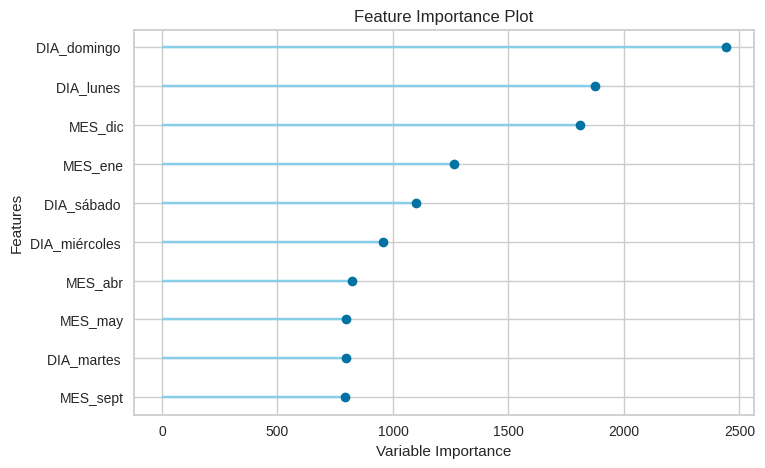

In [ ]:
# Igual de interesante es el gráfico de importancia de variables,
# para poder obtener conclusiones sobre las variables que más afectan a nuestra variable objetivo:
# Feature importance
plot_model(tuned_br, plot = 'feature')

In [ ]:
unseen_predictions2 = predict_model(tuned_br, data = data_test2)
unseen_predictions2.head(20)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,2977.7679,22202580.9176,4711.9615,0.1014,1.7191,1.0905


,DIA,MES,VENTAS,prediction_label
0,viernes,sept,3535,5374.241946
1,miércoles,sept,4599,3745.456911
2,lunes,sept,4000,2824.290640
3,jueves,sept,13450,4114.512683
4,miércoles,sept,324,3745.456911
5,martes,sept,4436,3904.697803
6,viernes,sept,4367,5374.241946
7,jueves,sept,2314,4114.512683
8,sábado,sept,4360,5798.716540
9,viernes,sept,7306,5374.241946


# **SALES PREDICTION PER YEAR**

In [ ]:
df.head()

,FECHA,VENTAS,DIA TEXTO,DIA NUMERO,MES,AÑO,DIA Y MES
0,2/10/23,7789,lunes,2,oct,2023,"lunes, octubre"
1,1/10/23,8262,domingo,1,oct,2023,"domingo, octubre"
2,30/9/23,8362,sábado,30,sept,2023,"sábado, septiembre"
3,29/9/23,3535,viernes,29,sept,2023,"viernes, septiembre"
4,28/9/23,5830,jueves,28,sept,2023,"jueves, septiembre"


In [ ]:
df.columns

Index(['FECHA', 'VENTAS', 'DIA TEXTO', 'DIA NUMERO', 'MES', 'AÑO',
       'DIA Y MES'],
      dtype='object')

In [ ]:
ventas = df[['AÑO', 'VENTAS']].groupby(by='AÑO').sum()
ventas

,VENTAS
AÑO,
2018,1656349
2019,1668834
2020,1606023
2021,2370715
2022,2415380
2023,1666289


In [ ]:
x = np.array([2018, 2019, 2020, 2021, 2022])
y = np.array([750859, 722835, 717084, 1023850, 995060])

In [ ]:
año = 2023
coef = np.polyfit(x, y, 8)
p = np.polyval(coef, año)
print(f'FOR THE YEAR {año} THE PREDICTION IS {p}')

FOR THE YEAR 2023 THE PREDICTION IS -960528.0


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
def fx (x1, coef):
    fx = 0
    n = len(coef) - 1
    for p in coef:
        fx = fx + p*x1**n
        n = n - 1
    return fx

FOR THE GRADE 0 THE PREDICT IS 841937.6


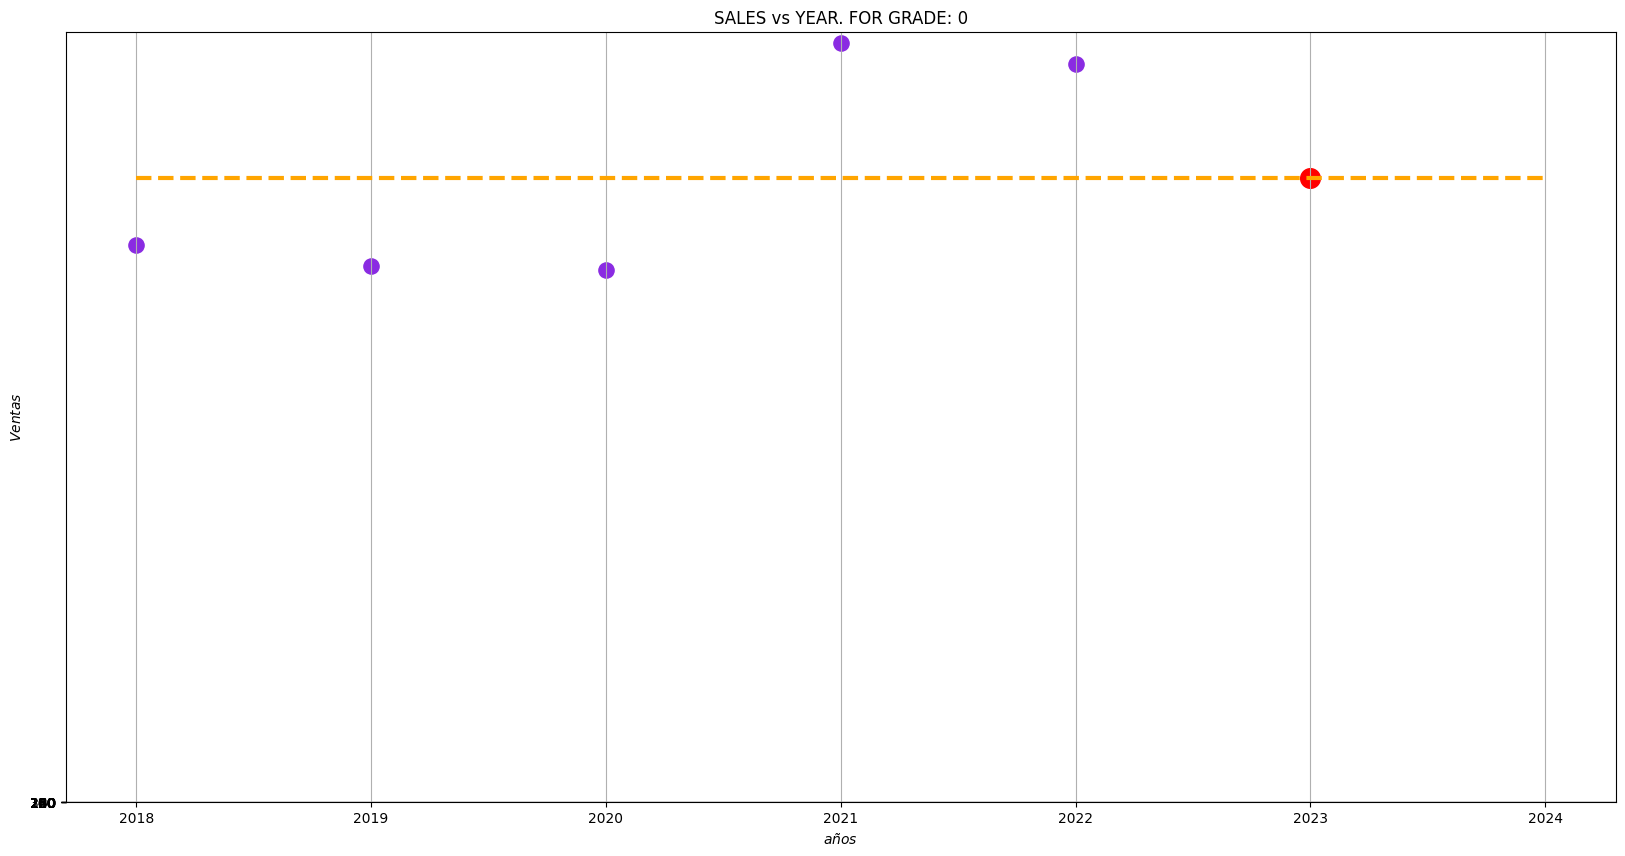

FOR THE GRADE 1 THE PREDICT IS 1078762.7000000477


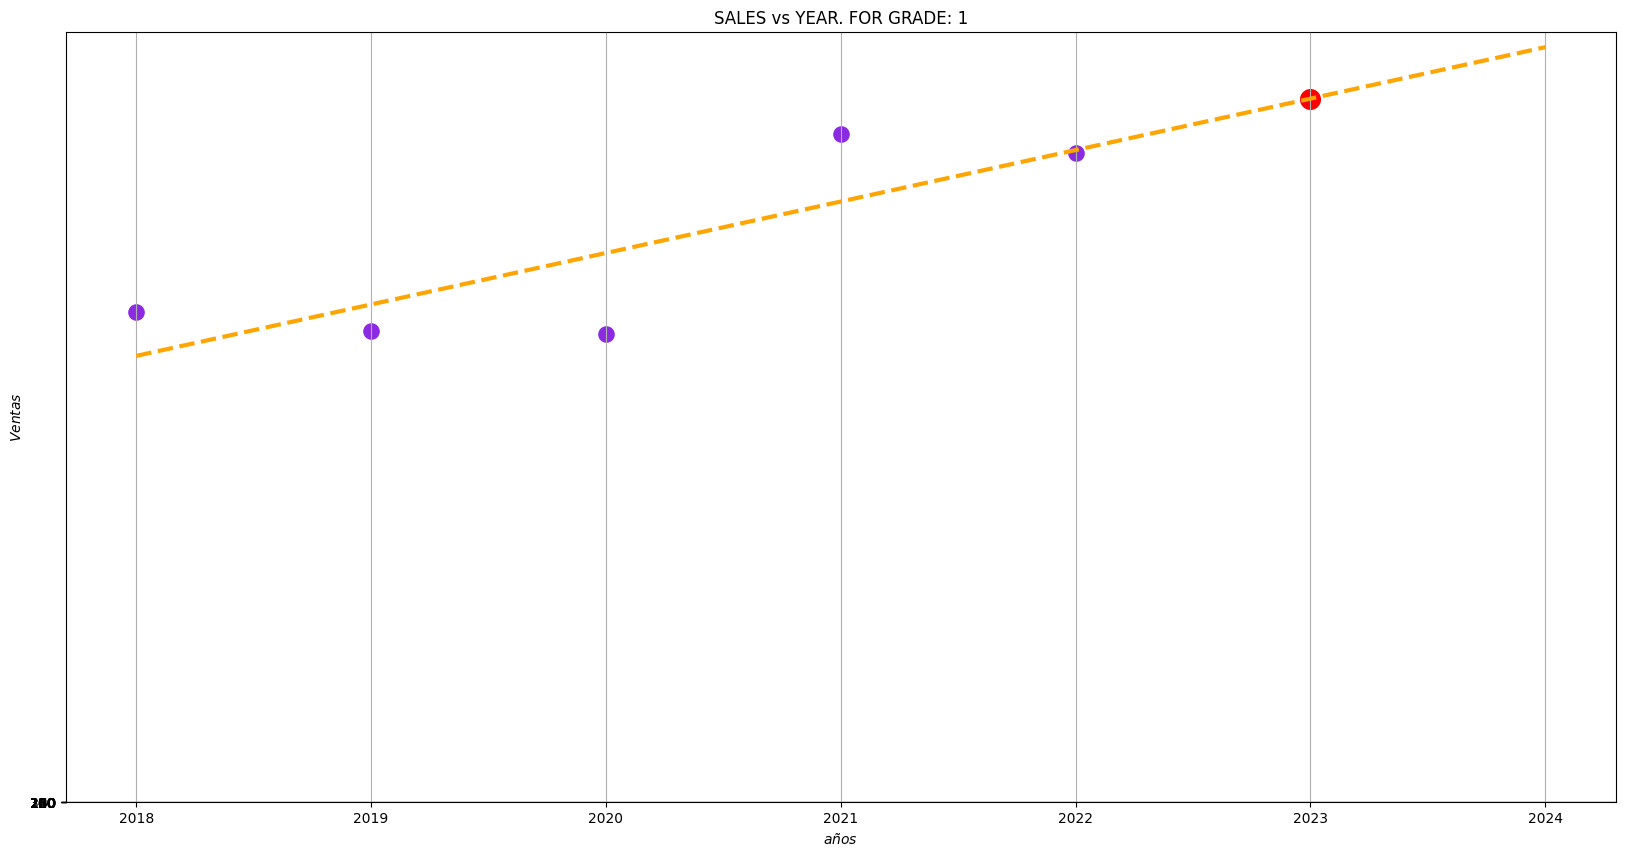

FOR THE GRADE 2 THE PREDICT IS 1234255.200012207


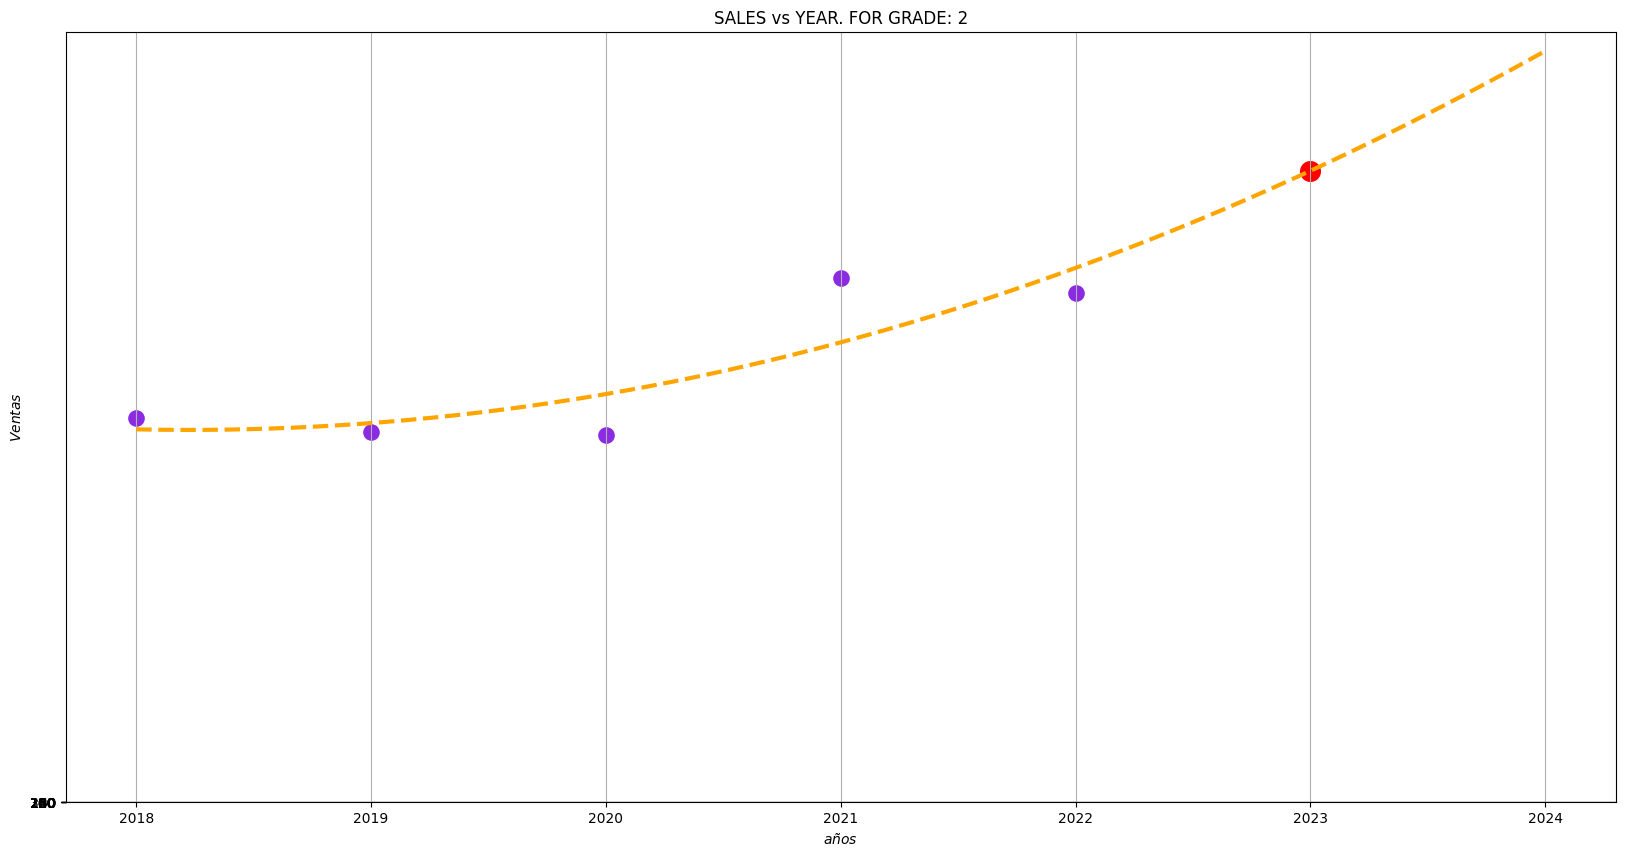

FOR THE GRADE 3 THE PREDICT IS 733294.375


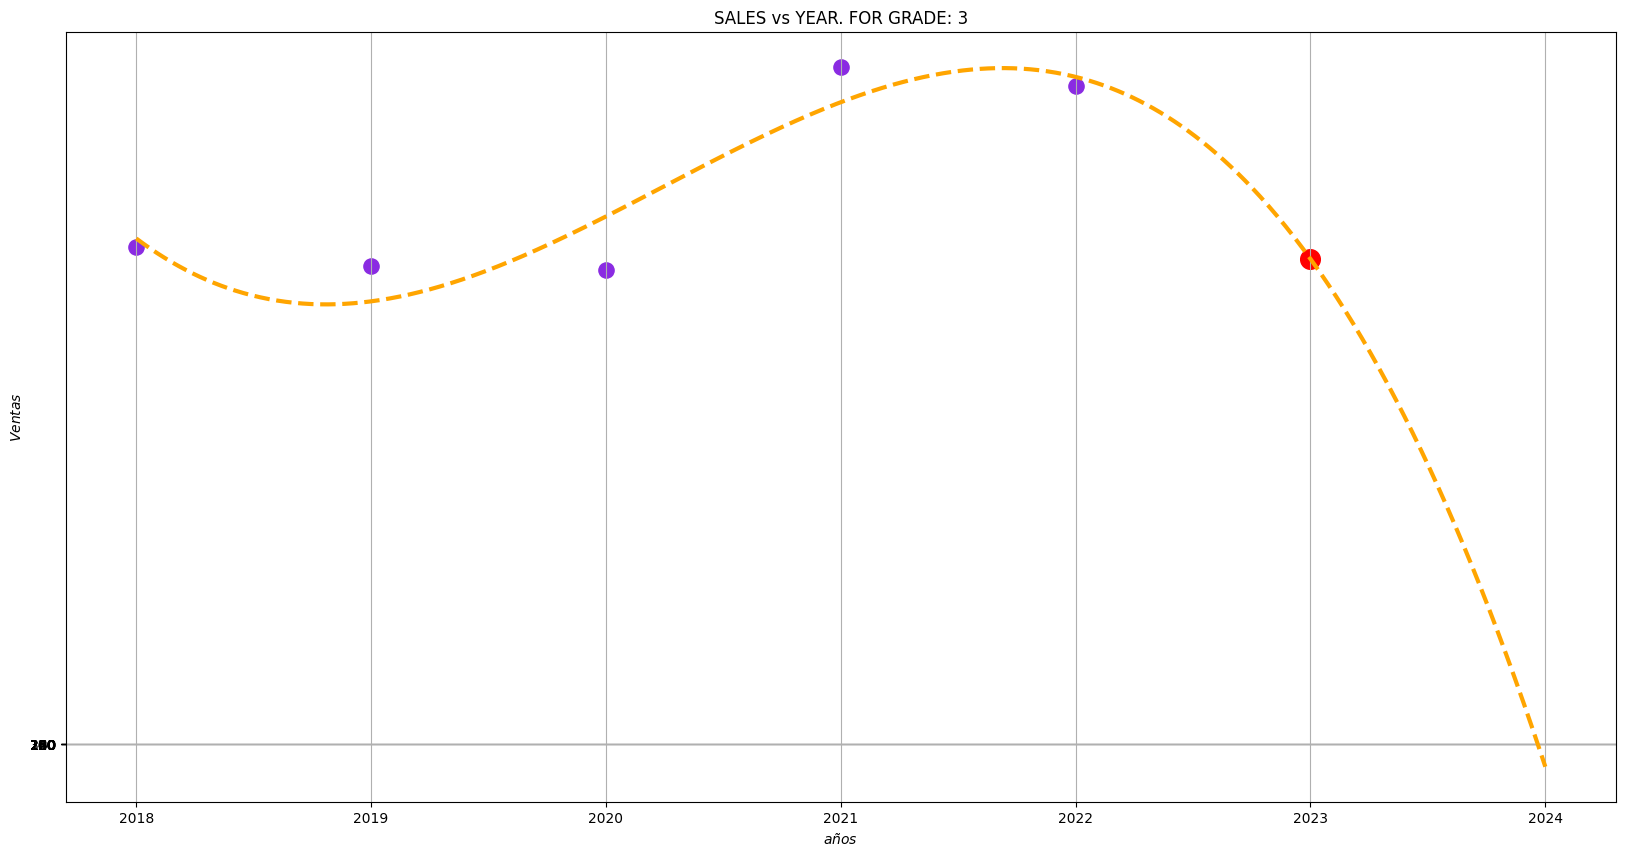

FOR THE GRADE 4 THE PREDICT IS -952576.0


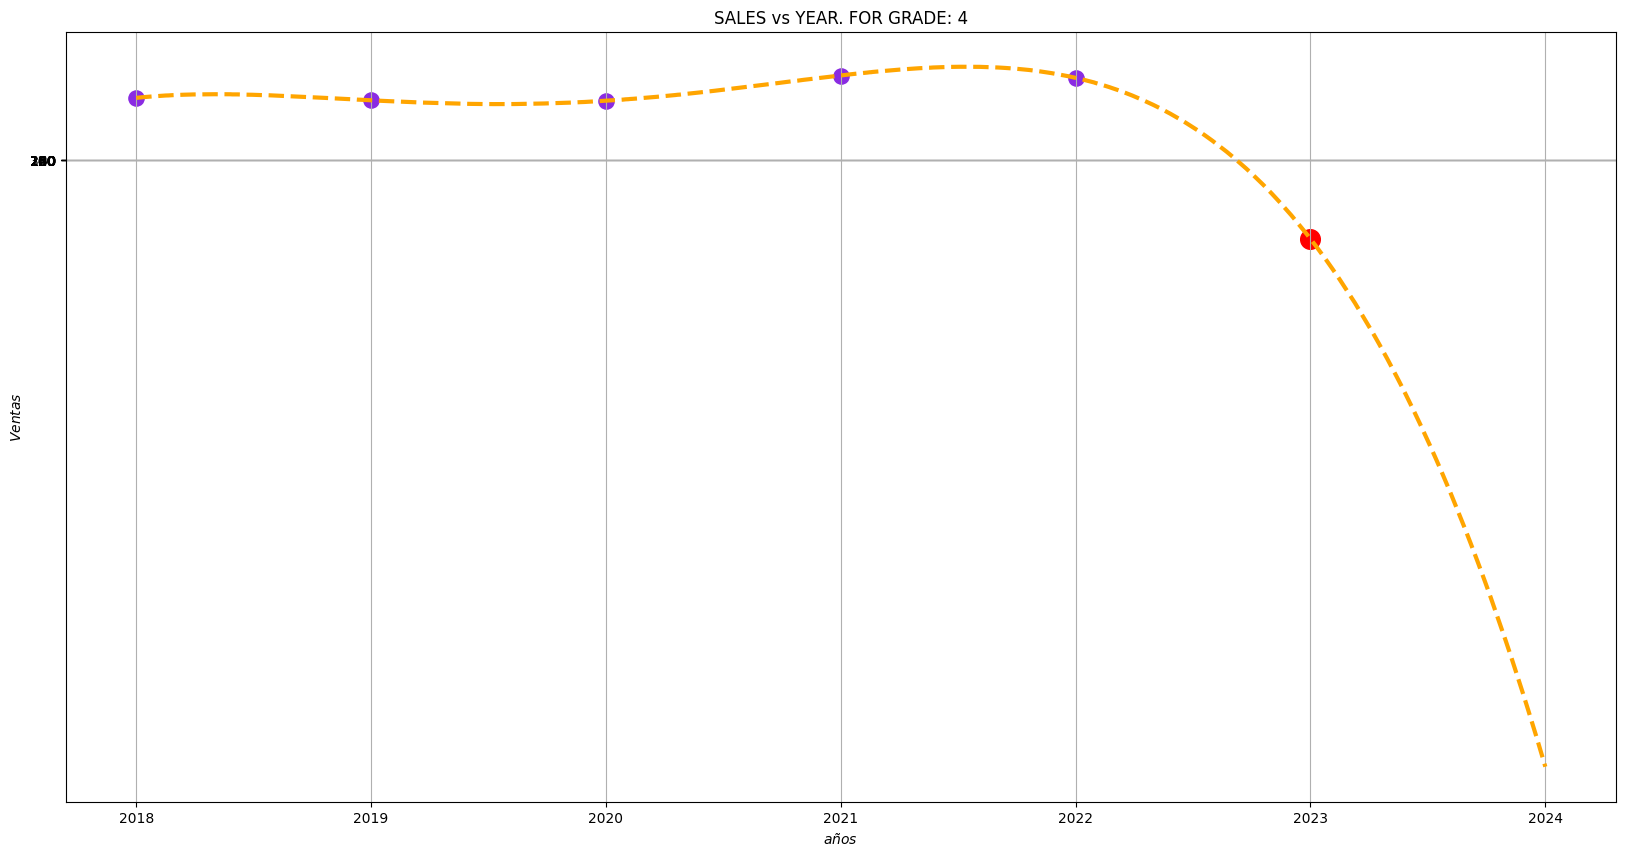

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


FOR THE GRADE 5 THE PREDICT IS -954560.0


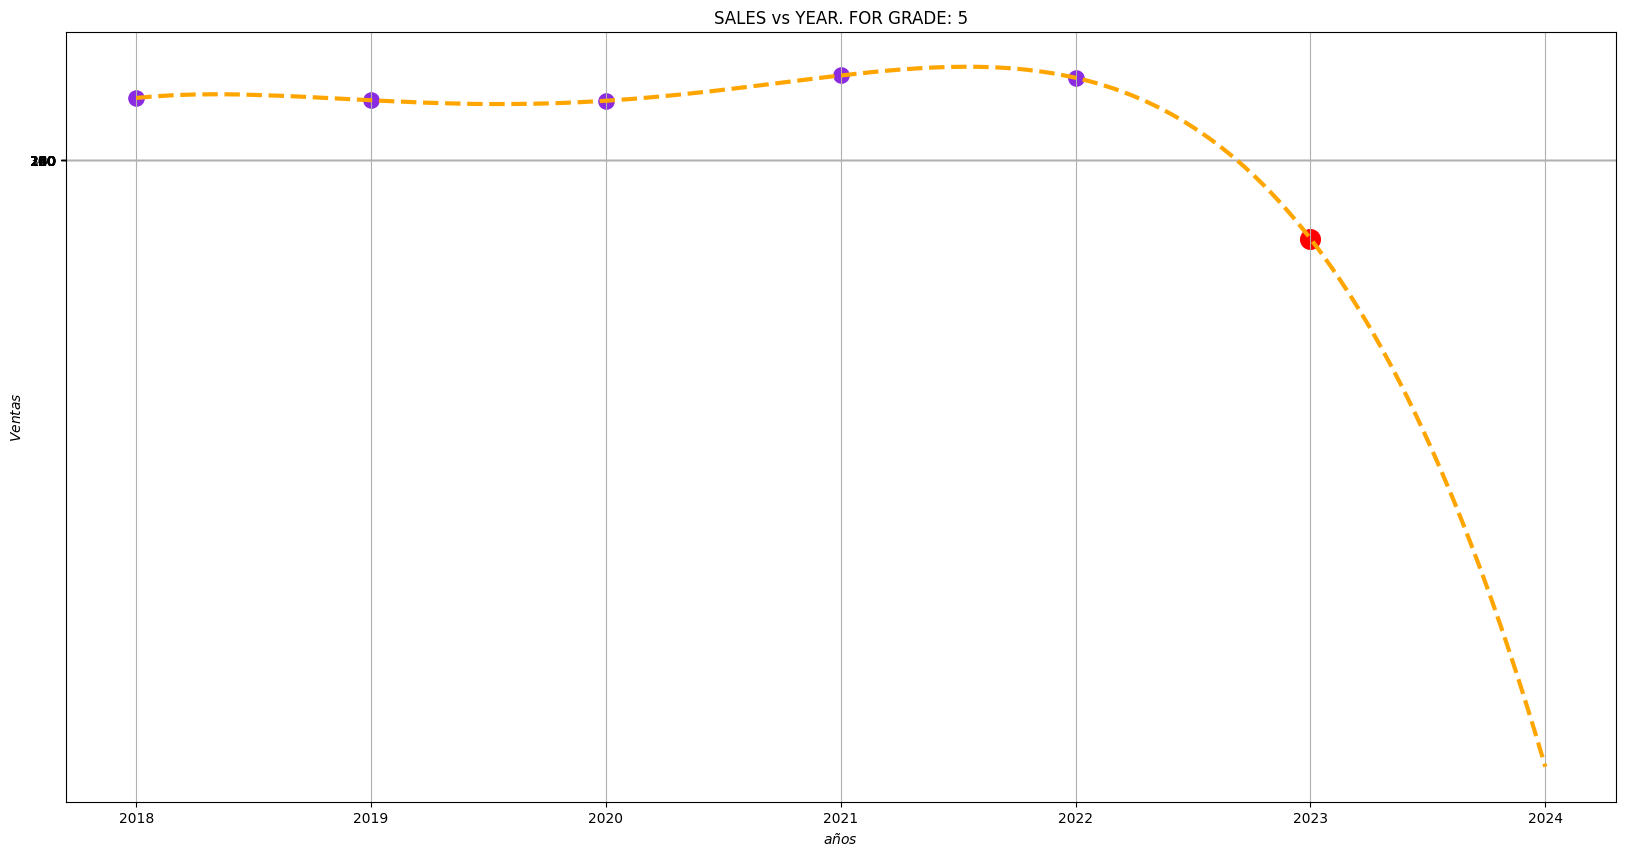

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


FOR THE GRADE 6 THE PREDICT IS -958240.0


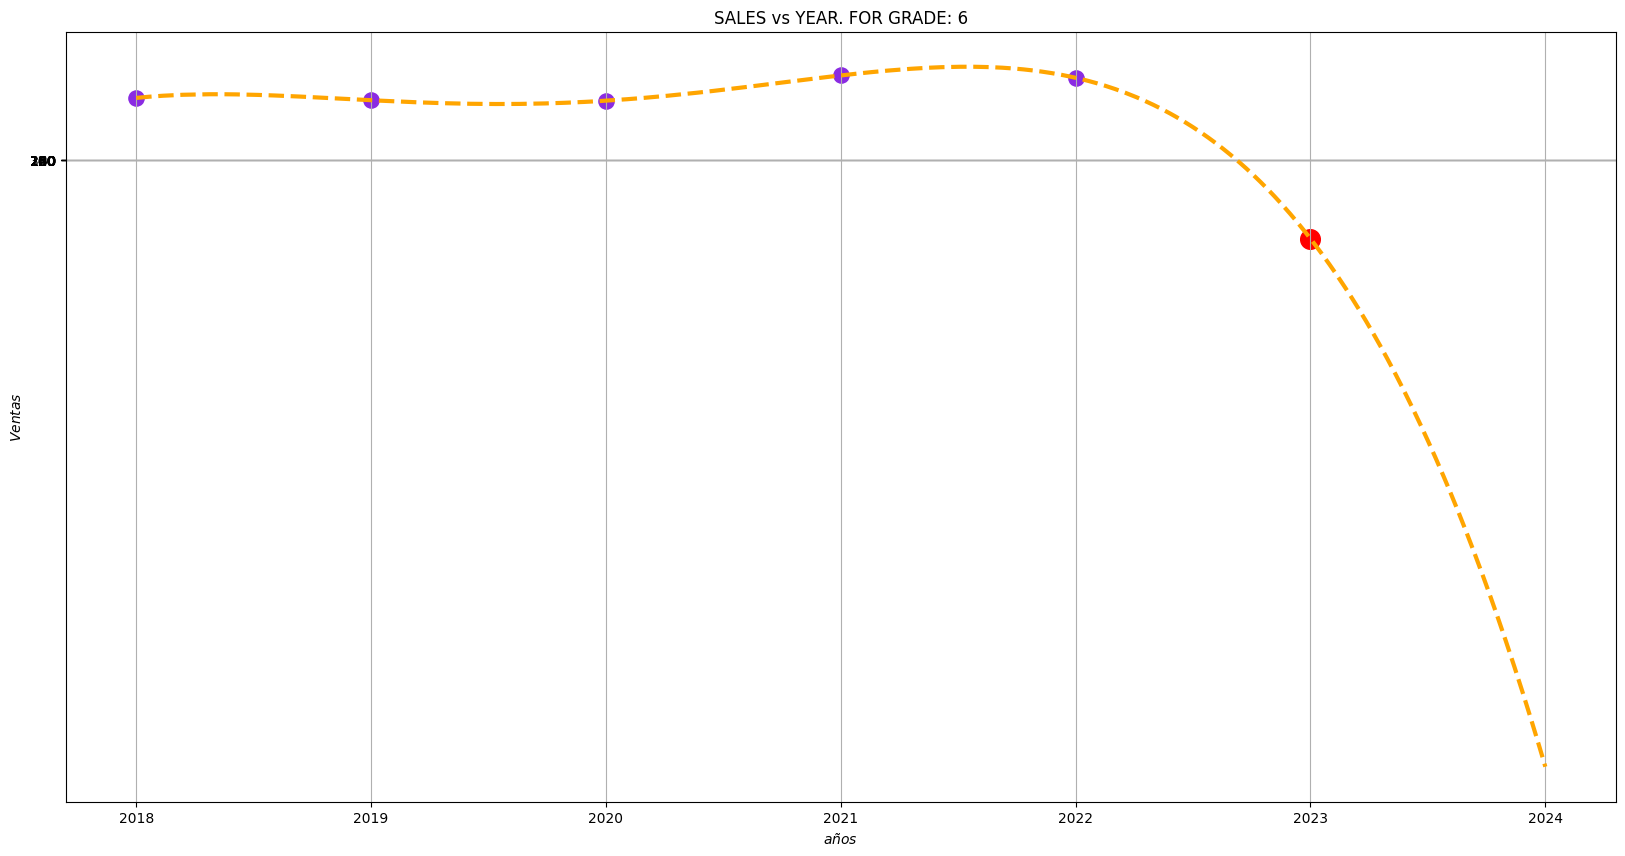

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


FOR THE GRADE 7 THE PREDICT IS -958672.0


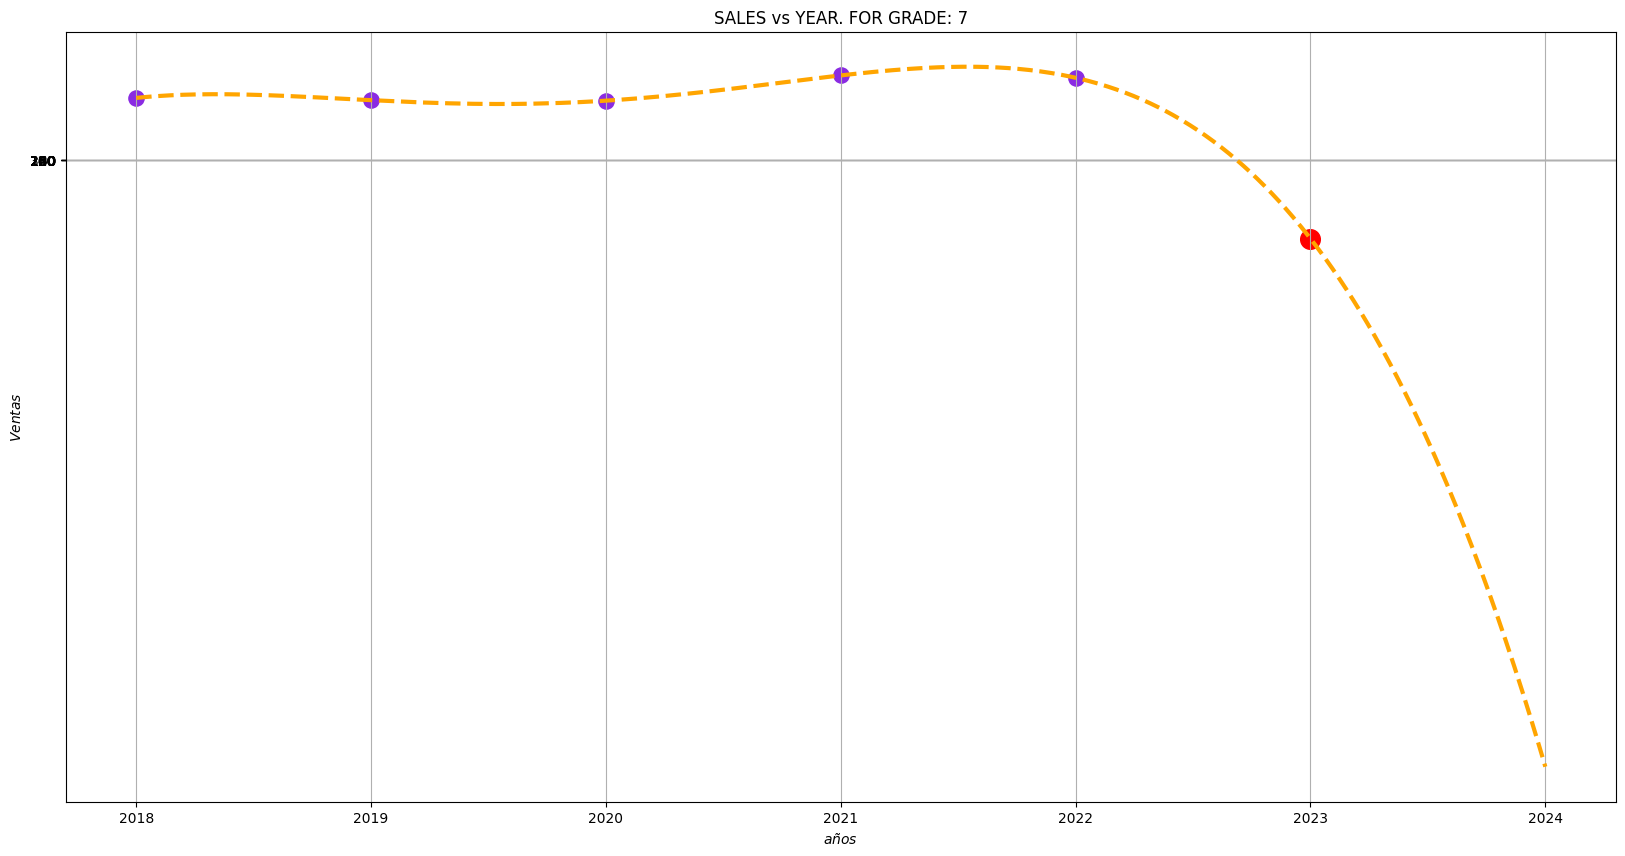

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


FOR THE GRADE 8 THE PREDICT IS -960528.0


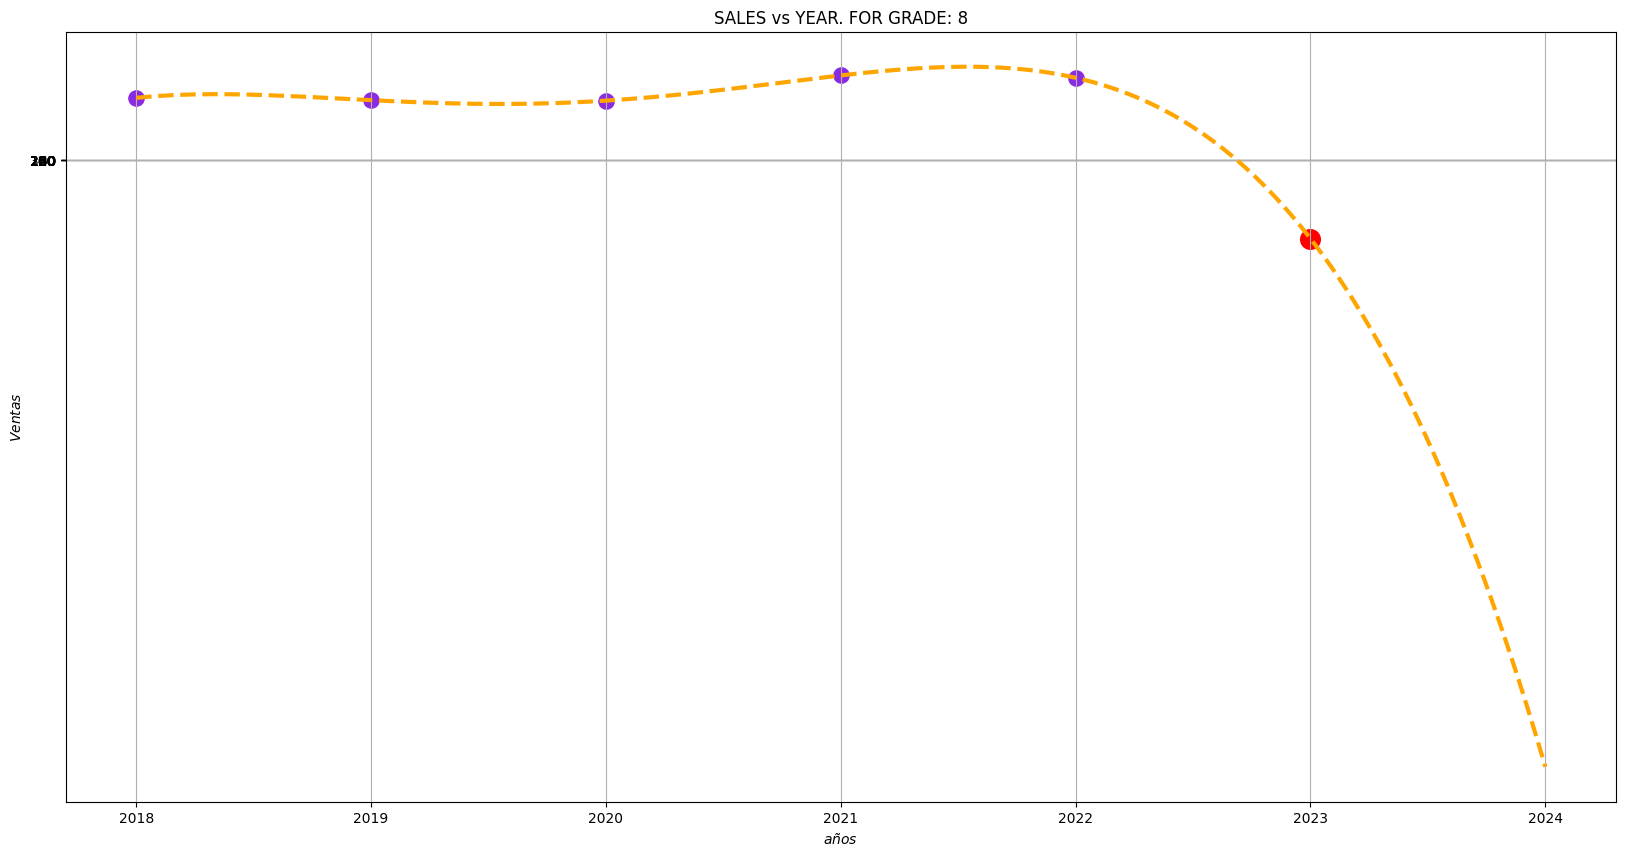

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


FOR THE GRADE 9 THE PREDICT IS -961576.0


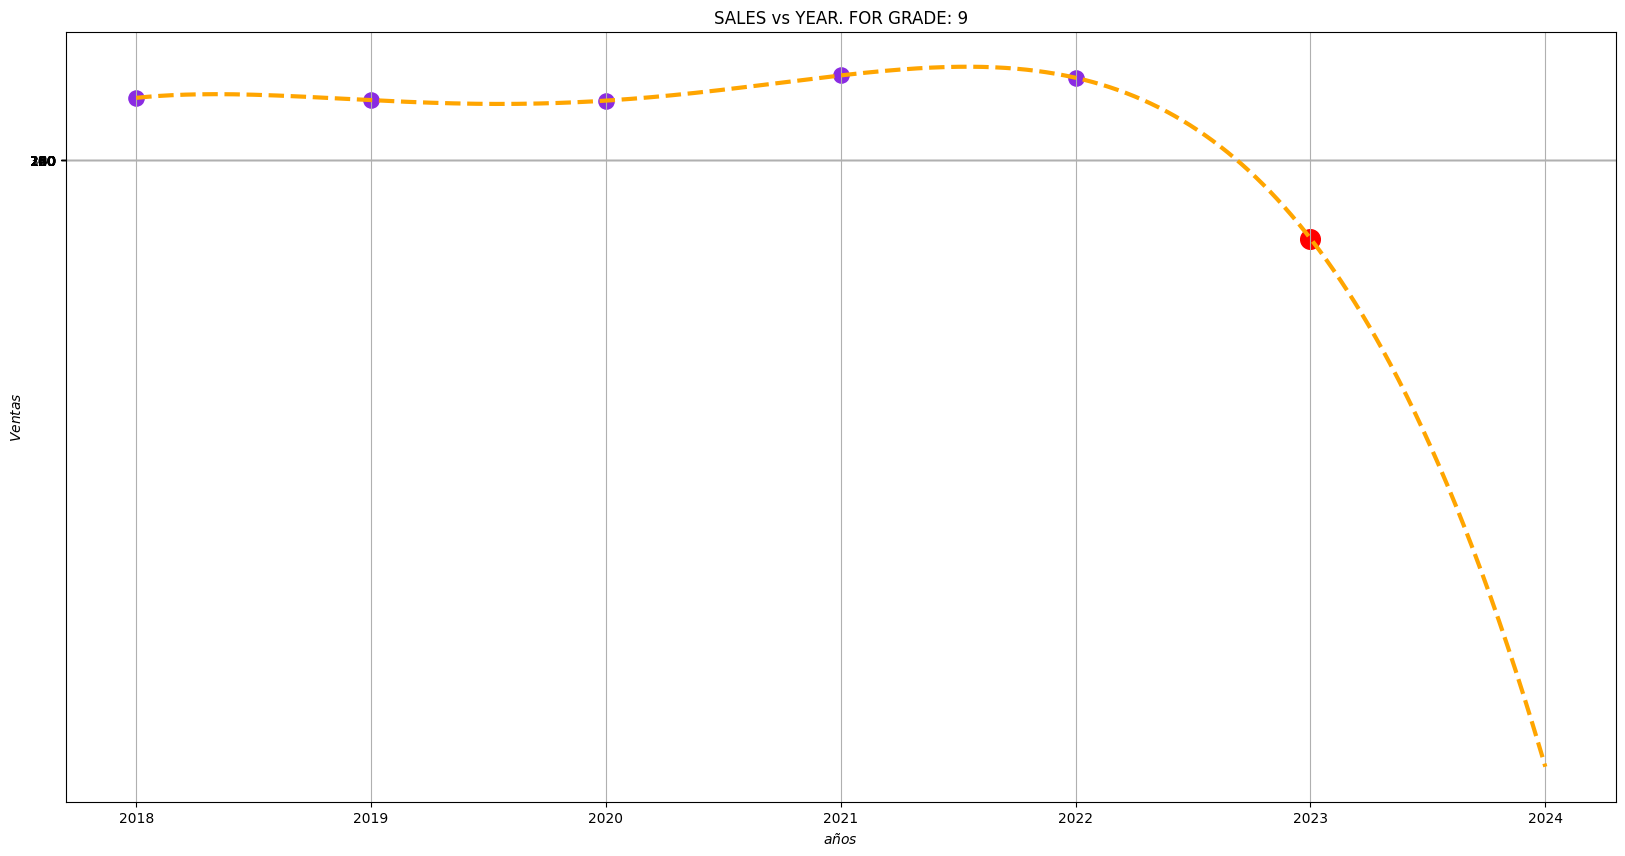

In [ ]:
anno = 2023
for i in range(0,10):
    coef = np.polyfit(x,y,i)
    p = np.polyval(coef, anno)

    print(f"FOR THE GRADE {i} THE PREDICT IS {p}")
    x1 = np.linspace(2018, anno + 1, 1000)
    y1 = fx(x1, coef) # funcion
    plt.figure(figsize=[20,10])
    plt.title("SALES vs YEAR. FOR GRADE: " + str(i))

    plt.scatter(x,y,s=120,c='blueviolet')
    plt.plot(x1,y1,"--",linewidth=3,color='orange')
    plt.scatter(anno,p,s=200,c='red')
    plt.yticks(range(100,320,20))
    plt.grid("on")
    ax=plt.gca()
    ax.set_xlabel("$años$")
    ax.set_ylabel("$Ventas$")
    #plt.savefig("img" + str(i)+".jpg", dpi=600)
    plt.show()